Student Name: Murshed SK<br>
Student Name: Asad Munir

# Solving Conductive Heat Transfer: Case of a window, with and without an insulating aire layer

In this training we wish to solve the 1D  conductive heat transfer problem. We will consider heat transfer in a 1D slab of material It could be a glass window for example.. The medium has a width L and a thermal conductivity K and a specific heat Cp and density $\rho$. 



The 1D heat diffusion equations reads :
    $\frac{\partial T}{\partial t}-\frac{K}{\rho Cp}\frac{\partial^2 T}{\partial x^2}=\frac{SK}{\rho Cp}$

where S is an energy source term (in $w/m^2$) that is non-zero if we inject energy in the system. For the moment we will assume that S=0

For glass, $K\simeq 1 w/m/K$, Cp=753 J/Kg/K, $\rho=2500 Kg/m^3$

## Diffusion timescale and the Courant condition (CFL)

We assume initially that the glass width is L =1 cm, and that the temperature everywhere is 300K initially. The right (x=0) and left (x=L) temperatures of the glass is $T_L$ and $T_R$. We will change the glass left and right temperatures and see how the temperature profile (T(x) for x ranging from 0 to L) evolves.

By doing a simple dimensional analysis, find a characteristic timescale $T_d$ using L (the width of the window),  $T_d$ as a function of L, K, $\rho$ $Cp$. $T_d$ is the diffusion timescale. We can also recognize that $D=K/\rho C_p$ is a diffusion coefficient, so the classical theory for diffusion processes applies here... 

$T_d=??$

 __Answer__<br>
 $T_d = \frac{L^2}{D}$, where $D = \frac{K}{\rho C_p}$<br>
 $\therefore  T_d = \frac{L^2 \rho C_p}{K}$


## Discretization of the problem

Now we want to solve the diffusion equation using a finite difference method.
We need first to write the integration scheme.
we call $x_i=i*dx$, $t_j=j*dt$ with i,j, integers, and dt and dx standing for the timestep and space step respectively. Let's call $T_i^j$ the numerical approximation to $T(x_i,t_j)$

We start doing first order in time and second order in space. 
For the time derive use a forward 1st order derivative. Give the 1st order forward approximation.


 __Answer__<br>
 $\frac{\partial T}{\partial t}= \frac{(T_i^{j+1}-T_i^{j})}{dt} +O(dt)$

For the temperature space derivative we need the second order derivative. As diffusion ois a process acting in both directions simultaneously we can use a centered scheme. Provide a 1st order cetered approximation to the second order derivative : You can have a look here : https://en.wikipedia.org/wiki/Finite_difference

 __Answer__<br>
$\frac{\partial^2 T}{\partial x^2}=\frac{(T_{i+1}^{j}{-}{2T_i^j}{+}{T_{i-1}^j)}}{dx^2}  +O(dx^2)$

From the above two expressions, build an integration scheme for the Heat diffusion equation :

 __Answer__<br>
$T^{j+1}_i= {(1-2\sigma){T_i^j} + \sigma{(T_{i-1}^{j} + T_{i+1}^j)}}$

We will discretise space by using N=50 cells. What is the time necessary, $T_{cell}$ for heat to diffuse over a cell ??  
 

 __Answer__<br>
$
T_{\text{cell}} = \frac{(\frac{L}{N})^2}{\frac{K}{\rho C_p}} = \frac{\rho C_p (L/N)^2}{K}
$
<br>
Substituting the given values into the above equation, we get:
<br>
$
T_{cell} \approx \frac{2500 \times 753 (0.01/50)^2}{1} = 0.0753s
$

## Numerically solving heat transfer accross the window

We will make sure, in the following to choose dt < $T_{cell}$. This will be our "CFL" condition in the diffusion case.


As boundary conditions, we will put $T_1^0=T_L$ and $T_N^0=T_R$, with $T_R=300K$ (warm interior) and $T_L=273K$ (freezing cold outside!).

The initial state is $T^0_{2..N-1}=300K$

integrate the evolution of the temperature from t=0 to $t_{end} = 10 T_d$


Write the code that compute the Evolution of the temperature profile. You have to 

*1) Define the X axis, dt, dx, the different constant, TR, TL

*2) Initialise T

*3) Do a loop over time. 

*4)      Compute dT/dt for each space bin i

*5)      Update T for each space bin i 

*6)     Update time

*7)     end of loop








DO : Provide 5 or 6 plots from 0 to $t_{end}$ display how heat is transfered

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Define constants and grid
L = 0.01  # Width of the glass (m)
N = 50    # Number of cells
dx = L / N  # Spatial step size (m)

K = 1       # Thermal conductivity (W/m/K)
Cp = 753    # Specific heat (J/kg/K)
rho = 2500  # Density (kg/m^3)
TR = 300    # Temperature at x = L (K)
TL = 273    # Temperature at x = 0 (K)

D = K / (rho * Cp)  # Diffusion coefficient (m^2/s)
T_d = L**2 / D  # Diffusion timescale (s)

dt = 0.5 * dx**2 / D  # Time step (CFL condition)
t_end = 10 * T_d      # Total simulation time (s)

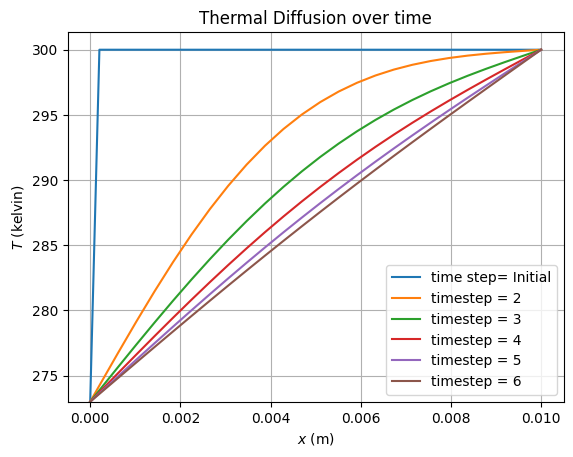

In [45]:
x = np.linspace(0, L, N)  # X-axis
T = np.ones(N) * TR       # Initialize temperature profile
T[0] = TL                 # Boundary condition at x = 0
T[-1] = TR                # Boundary condition at x = R
# Time integration
time = 0
stopper = 1500
j =0
plt.plot(x,T, label =f'time step= Initial')
while time <= t_end and j < stopper:
    T_new = T.copy()  # Copy of T for updates
    
    # Step 3: Compute dT/dt for inner points
    for i in range(1, N-1):
        T_new[i] = T[i] + dt * D / dx**2 * (T[i-1] - 2 * T[i] + T[i+1])
    
    # Update temperature and time
    T = T_new
    time += dt
    j+=1
    if j % 300 == 0:
        plt.plot(x,T,label=f'timestep = {1+int(j/300)}')
plt.legend()
plt.grid()
plt.ylim(273,)
plt.title('Thermal Diffusion over time')
plt.xlabel('$x$ (m)')
plt.ylabel('$T$ (kelvin)')
plt.show()

DO : show that at equilibrium the thermal gradient is constant.

__Answer:__<br>
At equilibrium, the temperature no longer changes with time. This means that the time derivative $\frac{\partial T}{\partial t}$ becomes zero.<br>
At equilibrium, the heat equation simplifies to:<br>
$
0 = \frac{K}{\rho C_p} \frac{\partial^2 T}{\partial x^2}
$
$\implies
\frac{\partial^2 T}{\partial x^2} = 0
$<br>
The solution to the differential equation $\frac{\partial^2 T}{\partial x^2} = 0$ is a linear function of $x$:<br>
$
T(x) = A x + B
$<br>
Where:
- $A$ is the slope of the temperature profile (which represents the thermal gradient).
- $B$ is the temperature at some reference position.<br>
Let's apply the boundary conditions:<br>
- $T(0) = T_L$, the temperature at $x = 0$.
- $T(L) = T_R$, the temperature at $x = L$.<br>
At the boundaries, we have:
<div align = 'center'>
$
T(0) = B = T_L
$<br>
$
T(L) = A L + B = T_R
$
</div>
From these, we can solve for $A$:<br>
<div align = 'center'>
$
A L + T_L = T_R
$<br>
$
A = \frac{T_R - T_L}{L}
$<br> </div>
Thus, the temperature profile at equilibrium is:<br>
$
T(x) = \frac{T_R - T_L}{L} x + T_L
$<br>
The thermal gradient is the derivative of the temperature profile with respect to $x$:<br>
$
\frac{\partial T}{\partial x} = \frac{T_R - T_L}{L}
$<br>
This shows that the temperature gradient $\frac{\partial T}{\partial x}$ is constant.<br>

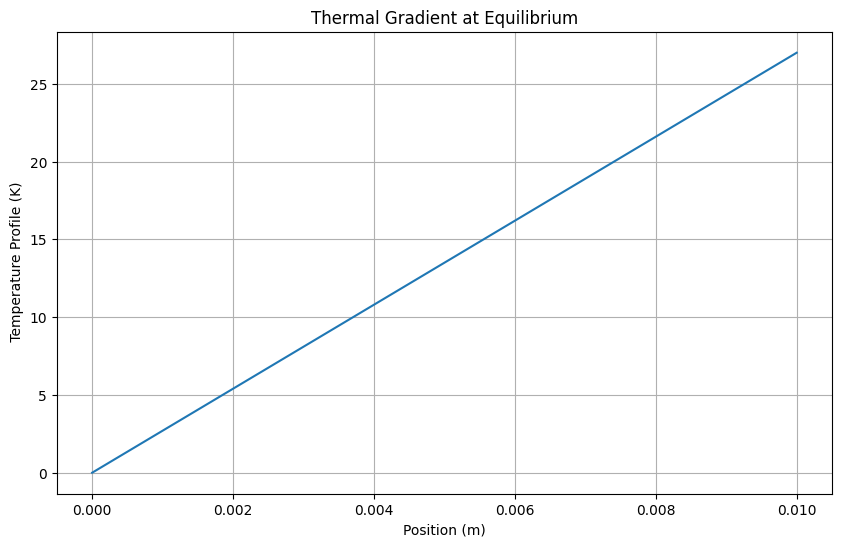

In [67]:
# Calculate gradient at equilibrium
T_eq = ((TR-TL)/L)*x
plt.figure(figsize=(10, 6))
plt.plot(x, T_eq)
plt.xlabel('Position (m)')
plt.ylabel(' Temperature Profile (K)')
plt.title('Thermal Gradient at Equilibrium')
plt.grid()
plt.show()

## Heat flux toward the exterior : energy loss 

At equilibrium what is the heat flux ? F=-K$\frac{\partial T}{\partial x}$, with K standing for the diffusion coefficient 

__Answer:__
<br>
$
F= - K \times \frac{\partial T}{\partial x} = - K\frac{T_R - T_L}{L}
$<br>
Substitute the values into the above equation:<br>
$
F = - 1 \times \frac{300 -273}{0.01} = -2700
$

## Inserting an insulating air-layer

Now we put an insulating layer with air. So our window is like a "sandwich", with 0.3 mm of glass, 0.4 mm of air, 0.3 mm of glass.  Air characteristics are at 273K :
K=0.025 W/m/K , Cp=1005 J/K/Kg, and $\rho= 1.30 Kg/m^3$.

Redo the same exercice as above :

Write the new code (BEWARE : now K, RHO, Cp are not the same evrywhere!!!!)

What is the effect of the insulating layer ? Show with plots 

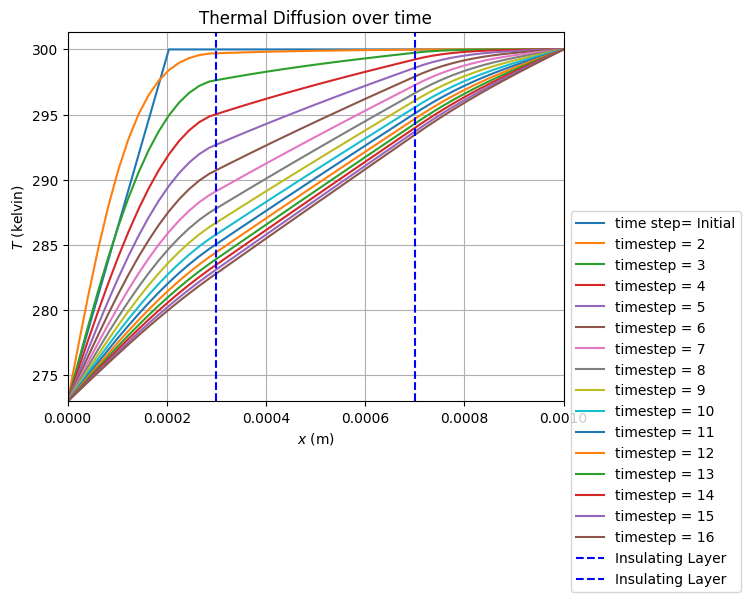

In [118]:
# Constants
L_glass = 0.0003  # Glass layer thickness (m)
L_air = 0.0004    # Air layer thickness (m)
L_total = 2 * L_glass + L_air  # Total thickness (m)

N_glass = 15  # Number of cells in each glass layer
N_air = 20    # Number of cells in the air layer
N_total = 2 * N_glass + N_air  # Total number of cells
dx = L_total / N_total  # Spatial step size (m)

# Glass properties
K_glass = 1      # W/m/K
Cp_glass = 753   # J/kg/K
rho_glass = 2500 # kg/m^3
D_glass = K_glass / (rho_glass * Cp_glass)

# Air properties
K_air = 0.025    # W/m/K
Cp_air = 1005    # J/kg/K
rho_air = 1.3    # kg/m^3
D_air = K_air / (rho_air * Cp_air)

# Boundary and initial conditions
T_L = 273        # Temperature at the left boundary (K)
T_R = 300        # Temperature at the right boundary (K)
T_initial = 300  # Initial temperature of the system (K)
T = np.ones(N_total) * T_initial  # Initialize temperature profile
T[0] = T_L  # Left boundary
T[-1] = T_R  #Right boundary

# Spatially varying properties (D array)
D=np.concatenate((np.full(N_glass,D_glass), # Glass (left)
np.full(N_air,D_air), # Air
np.full(N_glass,D_glass))) # Glass (right)
x1 = np.linspace(0,L_total, N_total)
# Time-stepping parameters
dt = 0.5 * dx**2 / max(D)  # Time step (CFL condition)
t_end = 10 * (L_total**2 / max(D))  # Total simulation time
sigma = dt * D / dx**2  # Array of sigma values

# Time integration
time = 0
stopper = 15000
j =0
plt.plot(x,T, label =f'time step= Initial')
while time <= t_end and j < stopper:
    T_new = T.copy()
    # Update temperature for inner points
    for i in range(1, N_total - 1):
        T_new[i] = (1 - 2 * sigma[i]) * T[i] + sigma[i] * (T[i - 1] + T[i + 1])
    
    # Update temperature and time
    T = T_new
    time += dt
    j+=1
    if j % 1000 == 0:
        plt.plot(x1,T,label=f'timestep = {1+int(j/1000)}')
plt.grid()
plt.ylim(273,)
plt.axvline(x=0.0003, color='blue', linestyle='--', label='Insulating Layer')
plt.axvline(x=0.0007, color='blue', linestyle='--', label='Insulating Layer')
plt.legend(loc='center left',bbox_to_anchor=(1, -1e-10))
plt.title('Thermal Diffusion over time')
plt.xlabel('$x$ (m)')
plt.ylabel('$T$ (kelvin)')
plt.xlim(0,0.001)
plt.show()

What is the Thermal profile in the thickness of the window ?

__Answer:__
<br>
The **thermal profile** in the thickness of the window represents how the temperature changes across the different layers of the window, including both the glass and air layers, as heat diffuses through the materials over time. 
<br>
It shows a **gradual temperature change** from the left boundary ($T_L$) to the right boundary ($T_R$), with more pronounced temperature gradients in the air layer due to its lower conductivity. The profile will evolve over time, and once steady-state is reached, the temperature distribution will remain constant, with the temperature drop more noticeable across the air layer than the glass layers.

What is the final heat flux ?

Conclusion ? What is the interest of the insulating layer ?

__Answer:__
<br>
The **final heat flux** through the window is given by the following formula:<br>
$
F = -K \frac{\partial T}{\partial x}
$
<br>
Since the heat flux is the same across all layers in steady state, the final heat flux can be calculated using the material with the smallest thermal conductivity (air layer), because the layer with the smallest conductivity will limit the overall heat flow.

For the air layer the value of thermal conductivity is : $K = 0.025 \text{W/m/K}$ <br>
The temperature difference across the window is $ \Delta T = T_R - T_L = 300 \, \text{K} - 273 \, \text{K} = 27 \, \text{K} $.<br>
The temperature gradient across the air layer $ \frac{dT}{dx} $ is:<br>
$
     \frac{dT}{dx} = \frac{27 \, \text{K}}{L_{\text{air}}} = \frac{27}{0.0004} = 67,500 \, \text{K/m}
$<br>
Therefore __the final heat flux__ is:<br>
$
q = k_{\text{air}} \times \frac{dT}{dx} = 0.025 \times 67,500 = 1,687.5 \, \text{W/m}^2
$
<br>
<br>
Conclusion :<br>
The **final heat flux** through the window, determined by the air layer, is approximately **1,687.5 W/m²**. This value represents the amount of heat transferred through the window from the warmer side to the cooler side at steady-state conditions.
This suggests that the insulating layer improves energy efficiency and comfort while reducing costs.
